In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from skmdn import MixtureDensityEstimator

In [4]:
import numpy as np
from sklearn.datasets import make_moons
# Generate dataset
n_samples = 1000
X_full, _ = make_moons(n_samples=n_samples, noise=0.1)
X = X_full[:, 0].reshape(-1, 1)  # Use only the first column as input
Y = X_full[:, 1].reshape(-1, 1)  # Predict the second column

# Add some noise to Y to make the problem more suitable for MDN
Y += 0.1 * np.random.randn(n_samples, 1)

In [5]:
from drawdata import ScatterWidget

widget = ScatterWidget()

In [6]:
widget

ScatterWidget()

In [7]:
mdn = MixtureDensityEstimator()
mdn.fit(X, Y)

MixtureDensityEstimator()

In [8]:
import matplotlib.pylab as plt

In [57]:
from ipywidgets import interact

import numpy as np
import matplotlib.pylab as plt

@interact(x=(-1.5, 2.5, 0.001))
def f(x):
    pdf, ys = mdn.pdf(np.array([x]).reshape(1, -1))
    cdf = pdf.cumsum()/pdf.cumsum().max()
    
    bestmean = ys[np.argmax(cdf > 0.5)]
    plt.figure(figsize=(10, 5))
    plt.subplot(131)
    plt.scatter(X, Y)
    plt.vlines(ymin=-1, ymax=1.5, x=x, color='orange', alpha=0.5)
    plt.scatter([x], [bestmean])
    plt.plot(pdf[0] + x, ys, color='orange')
    plt.title("interaction")
    
    plt.subplot(132)
    plt.plot(ys, pdf[0])
    plt.title("pdf")
    
    plt.subplot(133)
    plt.plot(ys, cdf)
    plt.scatter(ys[np.argmax(cdf > 0.5)], [0.5], color="orange")
    plt.title("cdf")

interactive(children=(FloatSlider(value=0.5, description='x', max=2.5, min=-1.5, step=0.001), Output()), _dom_…

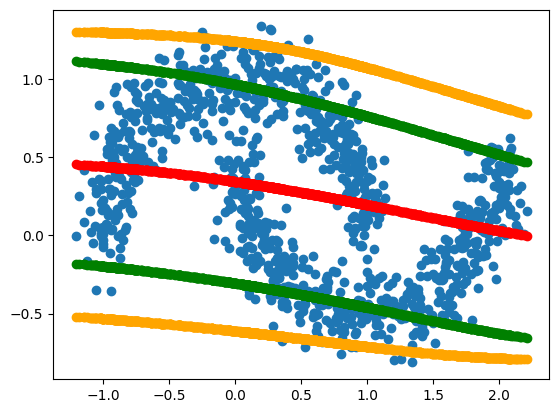

In [78]:
means, quantiles = mdn.predict(X, quantiles=[0.01, 0.1, 0.9, 0.99], resolution=100000)
plt.scatter(X, Y)
plt.scatter(X, quantiles[:, 0], color='orange')
plt.scatter(X, quantiles[:, 1], color='green')
plt.scatter(X, quantiles[:, 2], color='green')
plt.scatter(X, quantiles[:, 3], color='orange')
plt.scatter(X, means, color='red')

## And now ... a twist!

In [71]:
mdn1 = MixtureDensityEstimator()
mdn1.fit(X, Y)

MixtureDensityEstimator()

In [79]:
mdn2 = MixtureDensityEstimator(weight_decay=1e-2)
mdn2.fit(X, Y)

MixtureDensityEstimator(weight_decay=0.01)

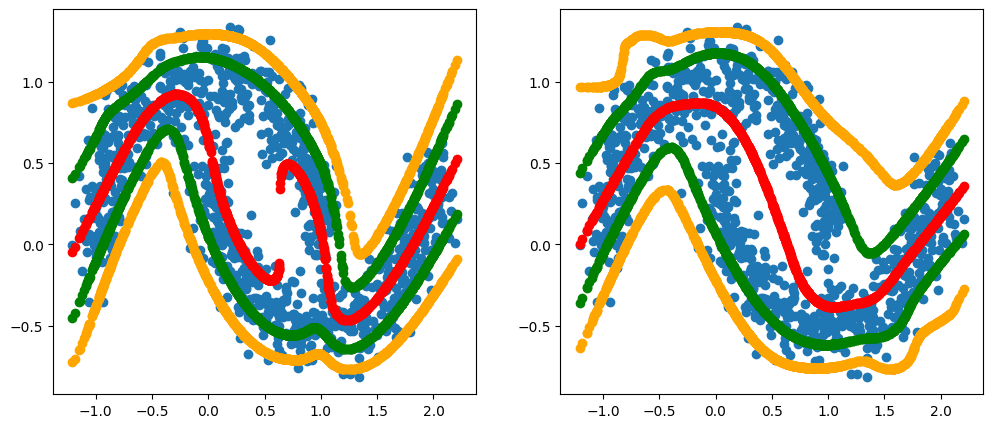

In [80]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
means, quantiles = mdn1.predict(X, quantiles=[0.01, 0.1, 0.9, 0.99], resolution=100000)
plt.scatter(X, Y)
plt.scatter(X, quantiles[:, 0], color='orange')
plt.scatter(X, quantiles[:, 1], color='green')
plt.scatter(X, quantiles[:, 2], color='green')
plt.scatter(X, quantiles[:, 3], color='orange')
plt.scatter(X, means, color='red')

plt.subplot(122)
means, quantiles = mdn2.predict(X, quantiles=[0.01, 0.1, 0.9, 0.99], resolution=100000)df[
plt.scatter(X, Y)
plt.scatter(X, quantiles[:, 0], color='orange')
plt.scatter(X, quantiles[:, 1], color='green')
plt.scatter(X, quantiles[:, 2], color='green')
plt.scatter(X, quantiles[:, 3], color='orange')
plt.scatter(X, means, color='red')